In [70]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### imports

In [71]:
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

Automatically created module for IPython interactive environment


### utilities

In [144]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [162]:
y

range(0, 5)

In [156]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=2/5, random_state=42, shuffle=False)
X_train1
# assert (X_train, X_test, y_train, y_test) == train_test_split(X, y, test_size=2/5, random_state=42, shuffle=False)

array([[0, 1],
       [2, 3],
       [4, 5]])

In [157]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=2/5, random_state=42, shuffle=False)
X_train2

array([[0, 1],
       [2, 3],
       [4, 5]])

In [170]:
z = {}
z.get(0, None)

In [172]:
48 / 49

0.9795918367346939

In [72]:
def sigmoid(x):
    return 1 / (1 + (np.e**-x))

def infer_topic(doc_vector, topic_word_distr):
    doc_topic_word_distr = topic_word_distr.copy()
    doc_word_freq_norm = (doc_vector > 0).astype(int)
#     doc_word_freq_norm = doc_vector / doc_vector.sum() if doc_vector.sum() else 0

    for label_class in label_classes:
        doc_topic_word_distr[label_class] *= doc_word_freq_norm
    
    
    doc_topic = np.max(doc_topic_word_distr).idxmax()
    return doc_topic_word_distr, doc_topic

### load dataset

In [122]:
# total number of samples needed
datasize = 100

# retrieve dataset
docs = fetch_20newsgroups(subset='train', shuffle=False, remove=('headers', 'footers', 'quotes'))
docs, old_labels, classes = docs.data[:datasize], docs.target[:datasize], docs.target_names

In [123]:
# the actual labels as np array
old_labels = np.array(old_labels)
labels = np.zeros(old_labels.shape, dtype=int)

# the new classes
label_classes = list(set([x.split('.')[0] for x in classes]))

# restructuring classes  from 19 to less
for label, cl in enumerate(classes):
    labels[old_labels == label] = label_classes.index(cl.split('.')[0])

In [124]:
print(f"there are {len(docs)} docs and {len(label_classes)} classes: {label_classes}")

there are 100 docs and 7 classes: ['talk', 'sci', 'alt', 'rec', 'soc', 'misc', 'comp']


### clean dataset

In [125]:
# clean out the new line characters from text in docs
def clean_doc(doc):
    ''' remove unwanter characters line new line '''

    unwanted_chrs = [')', '(', '{', '}', '\t', '\n', '\r', "'", '"', "!"]
    doc = doc.lower()
    for unwanted_chr in unwanted_chrs:
        doc = doc.replace(unwanted_chr, ' ')

    return doc.strip()

clean_docs = [clean_doc(doc) for doc in docs]
clean_docs[0]

'morgan and guzman will have era s 1 run higher than last year, and  the cubs will be idiots and not pitch harkey as much as hibbard.  castillo won t be good  i think he s a stud pitcher'

### count words

In [126]:
# initialize the count vectorizer
count_vectorizer = CountVectorizer()
# count_vectorizer = TfidfVectorizer()

# fit it to dataset
count_vectorizer.fit(clean_docs)

words = count_vectorizer.get_feature_names()

print("word_count is", len(words))

word_count is 5550


### Prepare Datatset

In [127]:
# create doc count vectors
doc_vectors = count_vectorizer.transform(clean_docs).toarray()



train_doc_vectors, test_doc_vectors, train_labels, test_labels = train_test_split(doc_vectors, labels, test_size=.33, random_state=42)
print(f"{len(train_labels)} train_docs, {len(test_labels)} test docs")

67 train_docs, 33 test docs


In [128]:
document_word_frequency = pd.DataFrame(train_doc_vectors, columns=count_vectorizer.get_feature_names())
document_word_binary_frequency = (document_word_frequency > 0).astype('int')

document_word_frequency["__labels__"] = train_labels
document_word_binary_frequency["__labels__"] = train_labels

print("document_word_frequency shape is", document_word_frequency.shape)

document_word_frequency shape is (67, 5551)


In [129]:
print(f"there are {len(clean_docs)} docs and {len(label_classes)} classes")

there are 100 docs and 7 classes


In [130]:
document_word_frequency.head()

,00,000,0188,02026,04110,0837,0988,0q,0qax,0qq,...,z6e1,z6e1t,z6ei,zealand,zeh,zip,zirconium,zone,zoomed,__labels__
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [131]:
document_word_binary_frequency.head()

,00,000,0188,02026,04110,0837,0988,0q,0qax,0qq,...,z6e1,z6e1t,z6ei,zealand,zeh,zip,zirconium,zone,zoomed,__labels__
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Prepare Binary Dataset

In [132]:
#reduce freq in doc to bin value of 1 or 0
word_doc_binary_freqency = document_word_binary_frequency.drop(["__labels__"], axis='columns')

#the sum vertically of bin freq
word_doc_frequency = word_doc_binary_freqency.sum(0) 

### Topic and word corelation

In [133]:
topic_word_distr = pd.DataFrame(data=0.0, columns=label_classes, index=words)

for topic, label in enumerate(label_classes):
    word_topic_frequency = word_doc_binary_freqency[document_word_frequency['__labels__'] == topic].sum(0)
    trust_factor = sigmoid(word_doc_frequency)
    
    topic_word_distr[label] = ((word_topic_frequency * trust_factor) / word_doc_frequency).fillna(0)
    
print(f"topic_word_distr has shape {topic_word_distr.shape}")

topic_word_distr has shape (5550, 7)


In [134]:
topic_word_distr.head()

,talk,sci,alt,rec,soc,misc,comp
00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
000,0.440399,0.440399,0.0,0.0,0.0,0.0,0.0
0188,0.000000,0.731059,0.0,0.0,0.0,0.0,0.0
02026,0.000000,0.731059,0.0,0.0,0.0,0.0,0.0
04110,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [135]:
label_classes

['talk', 'sci', 'alt', 'rec', 'soc', 'misc', 'comp']

In [136]:
label_class = 'comp'
topic_word_distr[label_class][topic_word_distr[label_class] > 0].sort_values(ascending=False)

windows    0.997527
problem    0.997527
bit        0.982014
advance    0.982014
change     0.982014
             ...   
around     0.111097
here       0.099995
most       0.083333
we         0.083333
just       0.083333
Name: comp, Length: 1365, dtype: float64

In [137]:
topic_word_distr.loc["the"]

talk    0.090909
sci     0.272727
alt     0.054545
rec     0.145455
soc     0.036364
misc    0.054545
comp    0.345455
Name: the, dtype: float64

### Word word corelation

In [138]:
word_word_distr = pd.DataFrame(data=0.0, columns=words, index=words)

for word in tqdm(words):
    word_word_frequency = word_doc_binary_freqency[word_doc_binary_freqency[word] > 0].sum(0)
    trust_factor = sigmoid(word_doc_frequency)

    word_word_co = ((word_word_frequency * trust_factor) / word_doc_frequency).fillna(0)
    word_word_distr[word][word_word_co > word_word_distr[word]] = word_word_co[word_word_co > word_word_distr[word]]

word_word_distr = word_word_distr.T
print("word_word_distr has shape", word_word_distr.shape)


word_word_distr has shape (5550, 5550)


In [139]:
word_word_distr.head()

,00,000,0188,02026,04110,0837,0988,0q,0qax,0qq,...,z5,z6e1,z6e1t,z6ei,zealand,zeh,zip,zirconium,zone,zoomed
00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
000,0.0,0.880797,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
0188,0.0,0.000000,0.731059,0.731059,0.0,0.731059,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.440399,0.0,0.0,0.0
02026,0.0,0.000000,0.731059,0.731059,0.0,0.731059,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.440399,0.0,0.0,0.0
04110,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [140]:
word = "computer"
word_word_distr[word][word_word_distr[word] > .5].sort_values(ascending=False)

of              0.952574
computer        0.952574
machine         0.952574
for             0.952574
am              0.952574
an              0.952574
and             0.952574
to              0.952574
one             0.952574
be              0.952574
in              0.952574
the             0.952574
out             0.952574
have            0.635049
if              0.635049
is              0.635049
functions       0.635049
it              0.635049
just            0.635049
has             0.635049
fast            0.635049
from            0.635049
first           0.635049
much            0.635049
by              0.635049
but             0.635049
at              0.635049
as              0.635049
any             0.635049
also            0.635049
all             0.635049
might           0.635049
you             0.635049
not             0.635049
substitution    0.635049
with            0.635049
which           0.635049
well            0.635049
was             0.635049
up              0.635049


### Building topic model

In [268]:
re_topic_word_distr = topic_word_distr.copy()

for word in tqdm(words):
    word_word_co = word_word_distr[word]
    
    for label_class in label_classes:
        infered_ratio = (word_word_co * topic_word_distr[label_class]).max()
        
        if infered_ratio > re_topic_word_distr[label_class][word]:
            re_topic_word_distr[label_class][word] = infered_ratio
            
print("re_topic_word_distr has shape", re_topic_word_distr.shape)


re_topic_word_distr has shape (19476, 7)


In [269]:
re_topic_word_distr.head()

,sci,soc,misc,rec,alt,comp,talk
00,0.217247,0.190412,0.124958,0.187437,0.055031,0.227176,0.374874
000,0.215250,0.088889,0.066667,0.266667,0.049983,0.245361,0.466667
0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
00000000,0.731059,0.321957,0.290466,0.364625,0.145233,0.548291,0.521709
00000000b,0.731059,0.321957,0.290466,0.364625,0.145233,0.548291,0.521709


In [270]:
word = "companies"
re_topic_word_distr.loc[word].sort_values(ascending=False)

rec     0.491007
sci     0.491007
comp    0.342217
talk    0.263982
soc     0.130424
alt     0.108119
misc    0.092064
Name: companies, dtype: float64

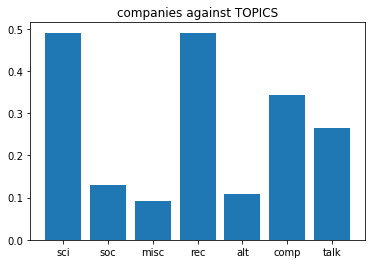

In [271]:
plt.title(f"{word} against TOPICS")
plt.bar(re_topic_word_distr.loc[word].index, re_topic_word_distr.loc[word])
plt.show()

### Evaluating Topic Model

In [272]:
score1 = score2 = 0
print("Evaluating Topic Model...")
for doc_index in tqdm(range(len(train_labels))):
    doc_vector = train_doc_vectors[doc_index]
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, topic_word_distr)
    score1 += int(doc_topic == label_classes[train_labels[doc_index]])
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, re_topic_word_distr)
    score2 += int(doc_topic == label_classes[train_labels[doc_index]])
    
    if score1:
        continue
    
#     print(clean_docs[len(train_labels)+doc_index])
#     print("{:8s} {:16s} {:6s}".format("topic", "word", "relation"))
#     print("="*40)
#     for label, word in doc_topic_word_distr.idxmax().items():
#         print("{:8s} {:16s} {:.4f}".format(label, word, doc_topic_word_distr[label][word]))

#     print(f"\nthe topic predicted is ==> '{np.max(doc_topic_word_distr).idxmax()}'")
#     print(f"the actual topic is ==> '{label_classes[labels[doc_index]]}'")

accuracy1 = score1 / (doc_index + 1)
accuracy2 = score2 / (doc_index + 1)
print(f"==> train-accuracy is {accuracy1*100:.2f}% and re is {accuracy2*100:.2f}%\n")

Evaluating Topic Model...



==> test-accuracy is 93.13% and re is 93.13%



### Testing Topic Model

In [273]:
score1 = score2 = 0
print("Evaluating Topic Model...")
for doc_index in tqdm(range(len(test_labels))):
    doc_vector = test_doc_vectors[doc_index]
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, topic_word_distr)
    score1 += int(doc_topic == label_classes[test_labels[doc_index]])
    
    doc_topic_word_distr, doc_topic = infer_topic(doc_vector, re_topic_word_distr)
    score2 += int(doc_topic == label_classes[test_labels[doc_index]])
    
    if score1:
        continue
    
#     print(clean_docs[len(train_labels)+doc_index])
#     print("{:8s} {:16s} {:6s}".format("topic", "word", "relation"))
#     print("="*40)
#     for label, word in doc_topic_word_distr.idxmax().items():
#         print("{:8s} {:16s} {:.4f}".format(label, word, doc_topic_word_distr[label][word]))

#     print(f"\nthe topic predicted is ==> '{np.max(doc_topic_word_distr).idxmax()}'")
#     print(f"the actual topic is ==> '{label_classes[labels[doc_index]]}'")

accuracy1 = score1 / (doc_index + 1)
accuracy2 = score2 / (doc_index + 1)
print(f"==> test-accuracy is {accuracy1*100:.2f}% and re is {accuracy2*100:.2f}%\n")

Evaluating Topic Model...



==> test-accuracy is 61.21% and re is 61.52%



In [274]:
label_classes

['sci', 'soc', 'misc', 'rec', 'alt', 'comp', 'talk']

In [64]:
from sklearn.linear_model import LogisticRegression

X = np.nan_to_num(train_doc_vectors / train_doc_vectors.sum(0))
y = train_labels

clf = LogisticRegression(random_state=0).fit(X, y)

print(len(X), "training data")

c:\users\christian\documents\christian\work\python\cyberspace\semantic_segmentation\venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


670 training data


In [65]:
clf.score(X, y)

0.9477611940298507

In [66]:
XX = np.nan_to_num(test_doc_vectors / test_doc_vectors.sum(0))#[test_labels == 2]
yy = test_labels#[test_labels == 2]

clf.score(XX, yy)

c:\users\christian\documents\christian\work\python\cyberspace\semantic_segmentation\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


0.5303030303030303

In [67]:
len(test_labels), len(yy)

(330, 330)

In [68]:
from sklearn.linear_model import LogisticRegression

X = np.nan_to_num(train_doc_vectors / train_doc_vectors.sum(0))
y = train_labels

models = []
for index in tqdm(range(len(count_vectorizer.get_feature_names()))):
    clf = LogisticRegression(random_state=0).fit(X[:, index:index+1], y)
    models.append(clf)
    
#     print("training score", clf.score(X[:, index:index+1], y))

c:\users\christian\documents\christian\work\python\cyberspace\semantic_segmentation\venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
XX = np.nan_to_num(test_doc_vectors / test_doc_vectors.sum(0))
yy = test_labels

p = np.zeros((len(XX[:, 0]), 7))

for index in tqdm(range(len(count_vectorizer.get_feature_names()))):
    clf = models[index]
    prob = clf.predict_proba(XX[:, index:index+1])
    p[prob > p] = prob[prob > p]

(p.argmax(1) == yy).mean()

c:\users\christian\documents\christian\work\python\cyberspace\semantic_segmentation\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


0.5151515151515151

0.24242424242424243